In [108]:
import csv
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict, Counter
import numpy as np
import math
import pandas as pd

In [109]:
data = pd.read_csv('data.csv')
data = data[~data['title'].isna()]
data = data[~data['time'].isna()]
print(f'Number of posts: {len(data)}')

show_hn_data = data[data['title'].str.startswith('Show HN')]
print(f'Number of Show HN posts: {len(show_hn_data)}')

Number of posts: 4010950
Number of Show HN posts: 119218


In [143]:
print('Average score of all posts:', data['score'].mean(), data['score'].median())
print('Average score of Show HN posts:', show_hn_data['score'].mean(), show_hn_data['score'].median())
print('Average score of Ask HN posts:', data[data['title'].str.startswith('Ask HN', na=False)]['score'].mean())
print('Average score of all posts with links:', data[data['url'].notnull()]['score'].mean())
print('Average score of all posts without links:', data[~data['url'].notnull()]['score'].mean())
print('Average score of Show HN posts with links:', show_hn_data[show_hn_data['url'].notnull()]['score'].mean())
print('Average score of Show HN posts with links:', show_hn_data[~show_hn_data['url'].notnull()]['score'].mean())

Average score of all posts: 15.177169997132848 2.0
Average score of Show HN posts: 16.95587075777148 3.0
Average score of Ask HN posts: 12.771544546865476
Average score of all posts with links: 15.38883777257707
Average score of all posts without links: 11.908547933525183
Average score of Show HN posts with links: 17.330706832475702
Average score of Show HN posts with links: 11.194040098873936


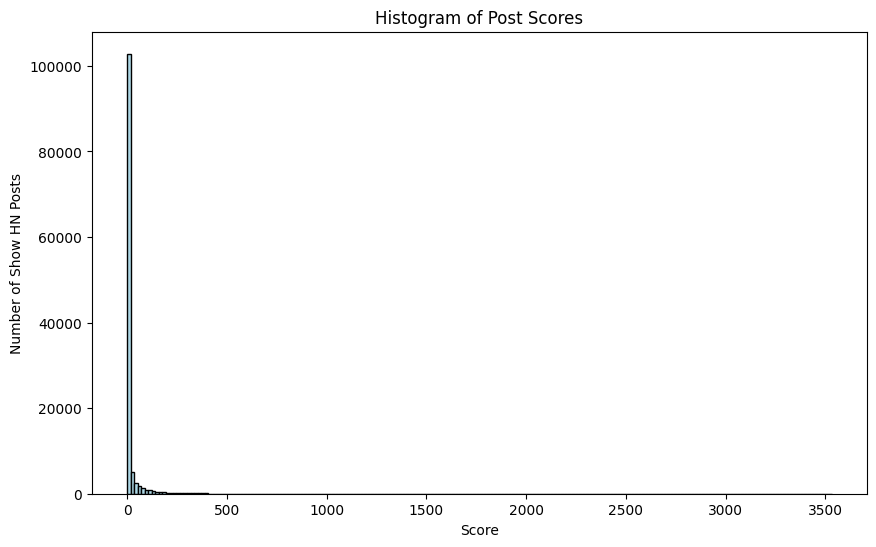

In [111]:
scores = show_hn_data['score'].tolist()

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=200, color='lightblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Show HN Posts')
plt.title('Histogram of Post Scores')
plt.show()

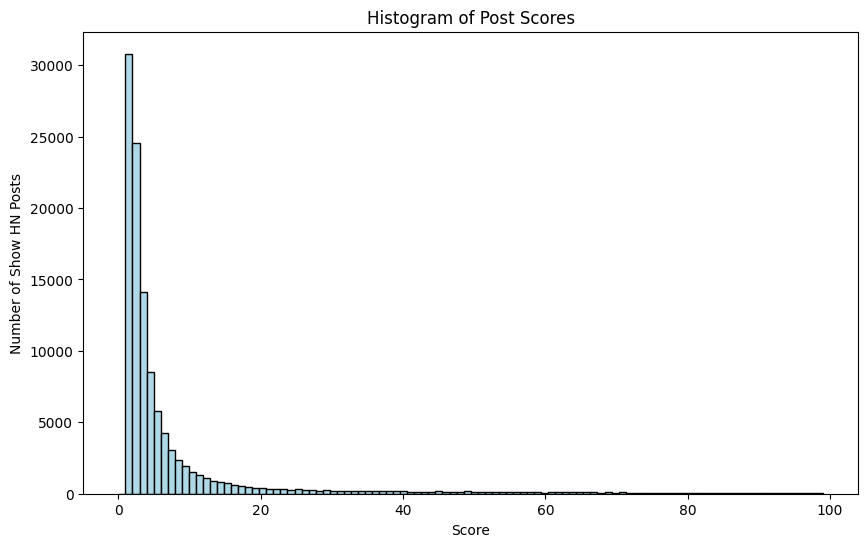

In [112]:
scores = show_hn_data['score'].tolist()
scores = [score for score in scores if score < 100]

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=100, color='lightblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Show HN Posts')
plt.title('Histogram of Post Scores')
plt.show()

In [113]:
print('Percentage of Show HN posts score more than 10:', len([score for score in show_hn_data['score'] if score > 10]) / len(show_hn_data) * 100)
print('Percentage of Show HN posts score more than 100:', len([score for score in show_hn_data['score'] if score > 100]) / len(show_hn_data) * 100)
print('Percentage of Show HN posts score more than 300:', len([score for score in show_hn_data['score'] if score > 300]) / len(show_hn_data) * 100)

Percentage of Show HN posts score more than 10: 18.72871546243017
Percentage of Show HN posts score more than 100: 4.105923602140616
Percentage of Show HN posts score more than 300: 0.8027311312050194


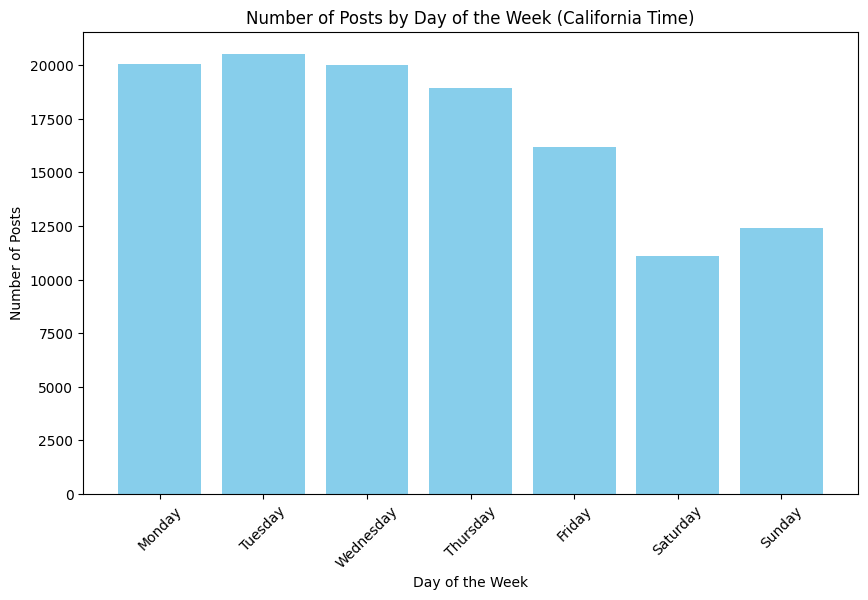

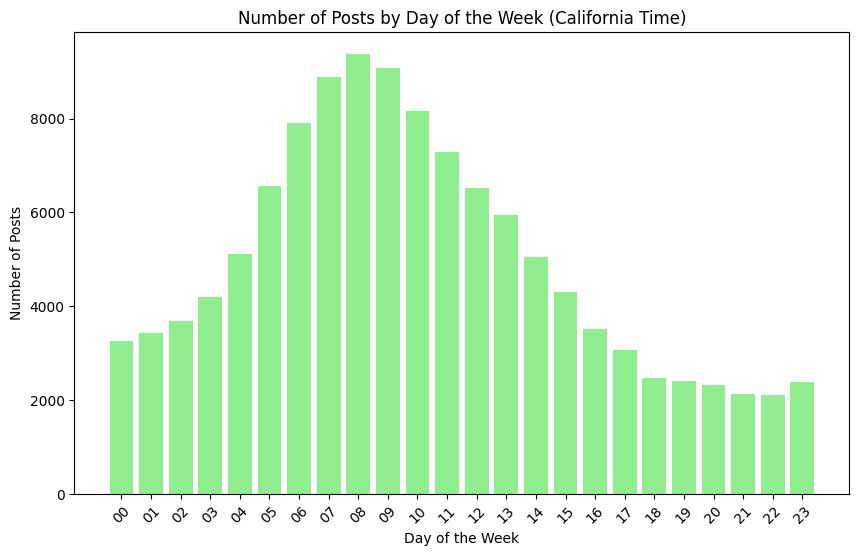

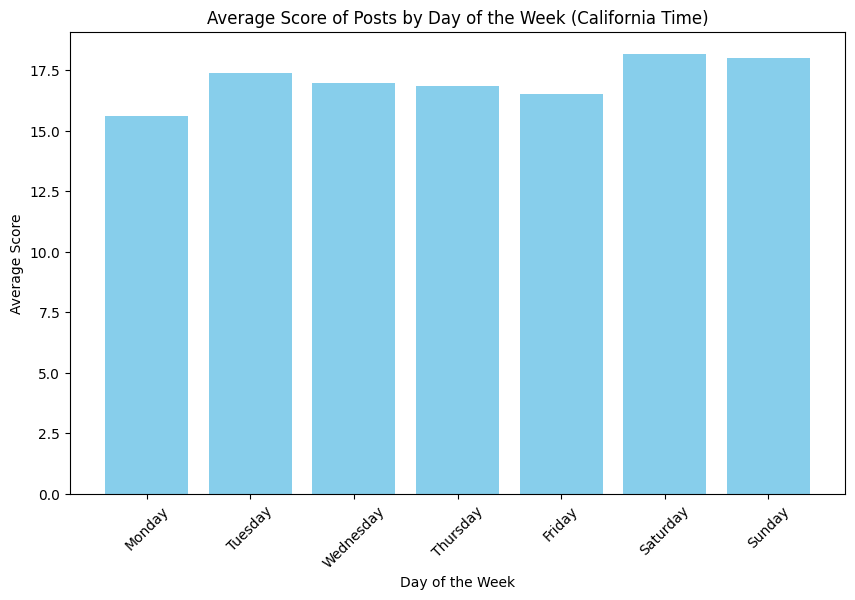

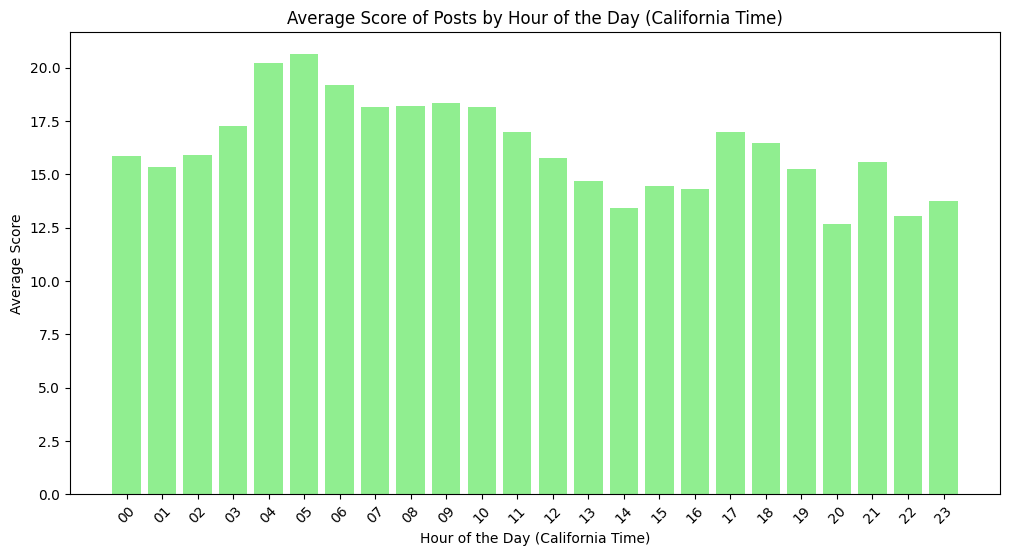

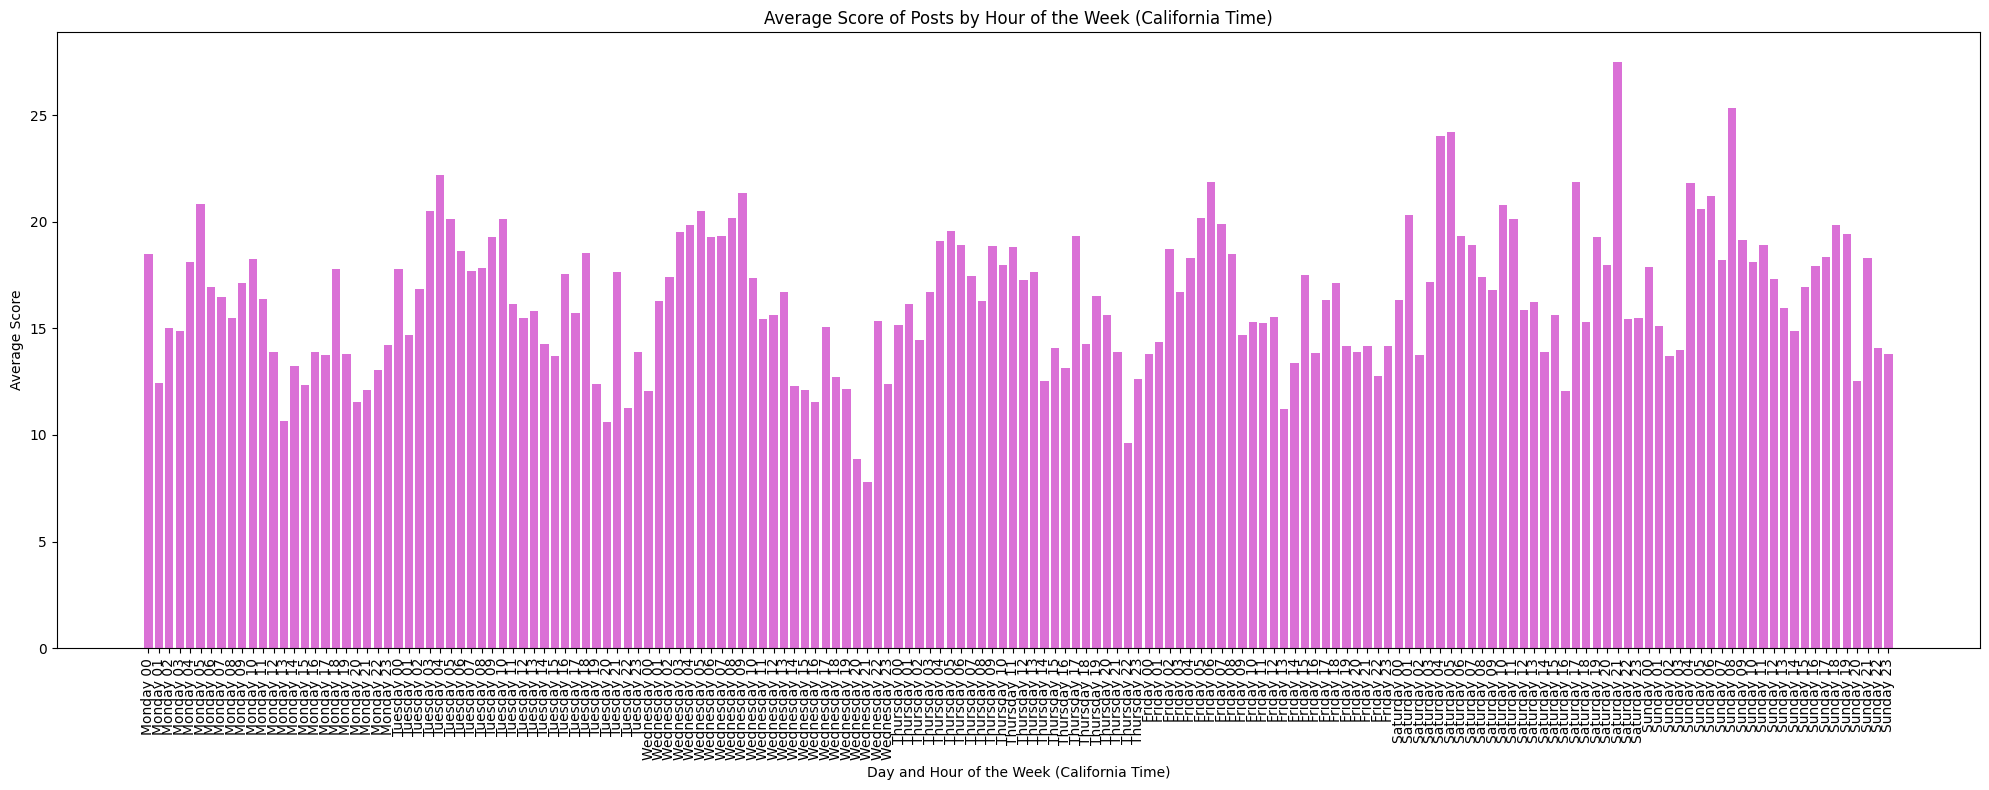

In [147]:
posts_by_weekday = Counter()
posts_by_hour = Counter()
scores_by_weekday = defaultdict(list)
scores_by_hour = defaultdict(list)
scores_by_hour_of_week = defaultdict(list)
for _, item in show_hn_data.iterrows():
    try:
        timestamp = datetime.fromtimestamp(int(item['time'].timestamp()), tz=pytz.utc).astimezone(pytz.timezone('America/Los_Angeles'))
    except ValueError:
        continue
    weekday = timestamp.strftime('%A')  # Get the full weekday name
    hour = timestamp.strftime('%H')  # Get the hour
    weekday_hour = timestamp.strftime('%A %H')  # Combine day of the week with hour
    posts_by_weekday[weekday] += 1
    posts_by_hour[hour] += 1
    scores_by_weekday[weekday].append(int(item['score']))
    scores_by_hour[hour].append(int(item['score']))
    scores_by_hour_of_week[weekday_hour].append(int(item['score']))

# Sort counts by the order in the week starting from Monday
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_hours = sorted(avg_scores_by_hour.keys())

posts_sorted_by_weekday = {day: posts_by_weekday[day] for day in sorted_days if day in posts_by_weekday}

posts_sorted_by_hour = {hour: posts_by_hour[hour] for hour in sorted_hours if hour in posts_by_hour}

avg_scores_by_weekday = {day: sum(scores)/len(scores) for day, scores in scores_by_weekday.items()}
avg_scores_sorted_by_weekday = {day: avg_scores[day] for day in sorted_days if day in avg_scores_by_weekday}

avg_scores_by_hour = {hour: sum(scores)/len(scores) for hour, scores in scores_by_hour.items()}
avg_scores_sorted_by_hour = {hour: avg_scores_by_hour[hour] for hour in sorted_hours}

avg_scores_by_hour_of_week = {key: sum(values)/len(values) for key, values in scores_by_hour_of_week.items()}
sorted_avg_scores_by_hour_of_week = OrderedDict(sorted(avg_scores_by_hour_of_week.items(), key=lambda x: (sorted_days.index(x[0].split()[0]), int(x[0].split()[1]))))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(posts_sorted_by_weekday.keys(), posts_sorted_by_weekday.values(), color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.title('Number of Posts by Day of the Week (California Time)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(posts_sorted_by_hour.keys(), posts_sorted_by_hour.values(), color='lightgreen')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.title('Number of Posts by Day of the Week (California Time)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(avg_scores_sorted_by_weekday.keys(), avg_scores_sorted_by_weekday.values(), color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Score')
plt.title('Average Score of Posts by Day of the Week (California Time)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(avg_scores_sorted_by_hour.keys(), avg_scores_sorted_by_hour.values(), color='lightgreen')
plt.xlabel('Hour of the Day (California Time)')
plt.ylabel('Average Score')
plt.title('Average Score of Posts by Hour of the Day (California Time)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20, 8))
plt.bar(range(len(sorted_avg_scores_by_hour_of_week )), list(sorted_avg_scores_by_hour_of_week .values()), align='center', color='orchid')
plt.xlabel('Day and Hour of the Week (California Time)')
plt.ylabel('Average Score')
plt.title('Average Score of Posts by Hour of the Week (California Time)')
plt.xticks(range(len(sorted_avg_scores_by_hour_of_week )), list(sorted_avg_scores_by_hour_of_week .keys()), rotation=90)
plt.tight_layout()
plt.show()

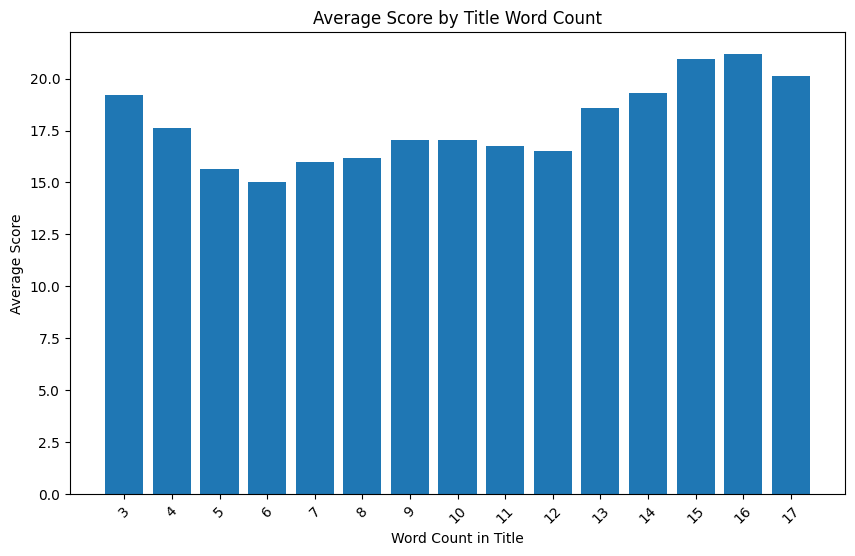

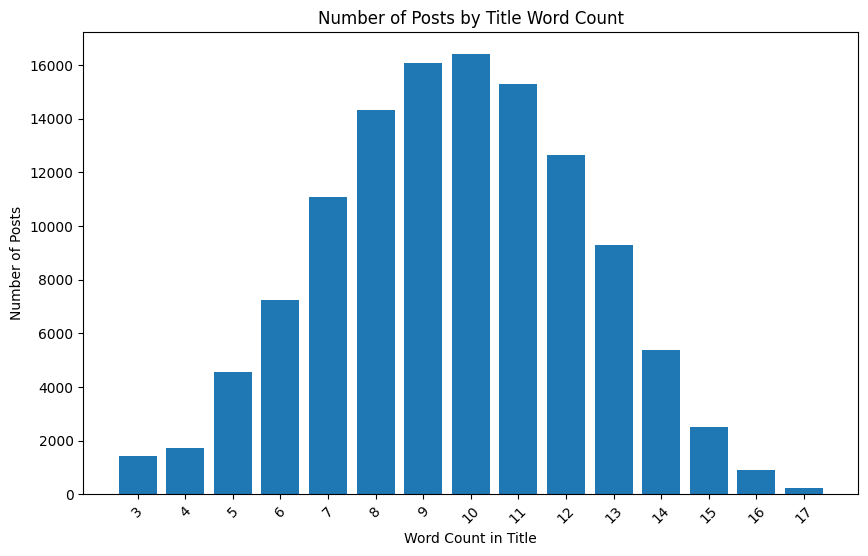

In [132]:
word_counts = defaultdict(list)
sorted_word_counts = sorted(word_counts.keys())
posts_counts = {}
for _, row in show_hn_data.iterrows():
    try:
        word_count = len(row['title'].split())
    except AttributeError:
        continue
    
    word_counts[word_count].append(int(row['score']))

    if word_count in posts_counts:
        posts_counts[word_count] += 1
    else:
        posts_counts[word_count] = 1

# filter out buckets with too few samples
word_counts = {wc: scores for wc, scores in word_counts.items() if len(scores) >= 100}

# Step 2: Calculate average scores for each word count
average_scores = {wc: sum(scores)/len(scores) for wc, scores in word_counts.items()}

# Prepare data for plotting
sorted_word_counts = sorted(average_scores.keys())
average_scores_list = [average_scores[wc] for wc in sorted_word_counts]

plt.figure(figsize=(10, 6))
plt.bar(range(len(average_scores)), average_scores_list, tick_label=sorted_word_counts)
plt.title('Average Score by Title Word Count')
plt.xlabel('Word Count in Title')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_word_counts)), [posts_counts[wc] for wc in sorted_word_counts], tick_label=sorted_word_counts)
plt.title('Number of Posts by Title Word Count')
plt.xlabel('Word Count in Title')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

In [150]:
scores_upper = []
scores_lower = []
for _, row in show_hn_data.iterrows():
    try:
        words = row['title'].split()
    except AttributeError:
        continue
    upper_count = sum([w[0].upper() == w[0] for w in words])
    ratio = upper_count / len(words)
    if ratio > 0.7:
        scores_upper.append(row['score'])
    if ratio < 0.5:
        scores_lower.append(row['score'])

print('Average score', show_hn_data['score'].mean())
print('Average score of posts with upper cases', sum(scores_upper) / len(scores_upper))
print('Average score of posts with lower cases', sum(scores_lower) / len(scores_lower))

Average score 16.95587075777148
Average score of posts with upper cases 14.643670680117149
Average score of posts with lower cases 17.482964866421515


In [151]:
scores = []
for _, row in show_hn_data.iterrows():
    try:
        words = row['title'].split()
        if 'I' in words:
            scores.append(row['score'])
    except AttributeError:
        continue

print('Average score of Show HN with "I" in title:', sum(scores) / len(scores))

Average score of Show HN with "I" in title: 34.35147190008921
